## Himanshu Baweja

## E20CSE212

## Week 10 Lab 2

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression

In [5]:
data=pd.read_csv("Salary_Data.csv")
print(data.shape)

(30, 2)


In [6]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
x=data.iloc[:,:1]
print(x)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [9]:
y=data.iloc[:,1]
print(y)

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64


In [10]:
x_train, x_test,y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.svm import SVR
model= SVR()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [12]:
print("for this model\n")
print("Mean squared error:",mse(y_test,y_pred))
print("Mean absolute error:",mae(y_test,y_pred))
print("Root Mean squared error:",mse(y_test,y_pred,squared=False))

for this model

Mean squared error: 1453352527.2320566
Mean absolute error: 31787.932876804236
Root Mean squared error: 38122.86095287258


In [13]:
model1= SVR(kernel='sigmoid',C=1.5,coef0=0.5)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [14]:
print("for this model\n")
print("Mean squared error:",mse(y_test,y_pred1))
print("Mean absolute error:",mae(y_test,y_pred1))
print("Root Mean squared error:",mse(y_test,y_pred1,squared=False))

for this model

Mean squared error: 1453900876.1686313
Mean absolute error: 31794.196491036204
Root Mean squared error: 38130.05213960022


In [15]:
model3=LinearRegression()
model3.fit(x_train,y_train)
y_pred3=model.predict(x_test)

In [16]:
print("FOR LINEAR REGRESSION\n")
print("Mean squared error:",mse(y_test,y_pred3))
print("Mean absolute error:",mae(y_test,y_pred3))
print("Root Mean squared error:",mse(y_test,y_pred3,squared=False))

FOR LINEAR REGRESSION

Mean squared error: 1453352527.2320566
Mean absolute error: 31787.932876804236
Root Mean squared error: 38122.86095287258


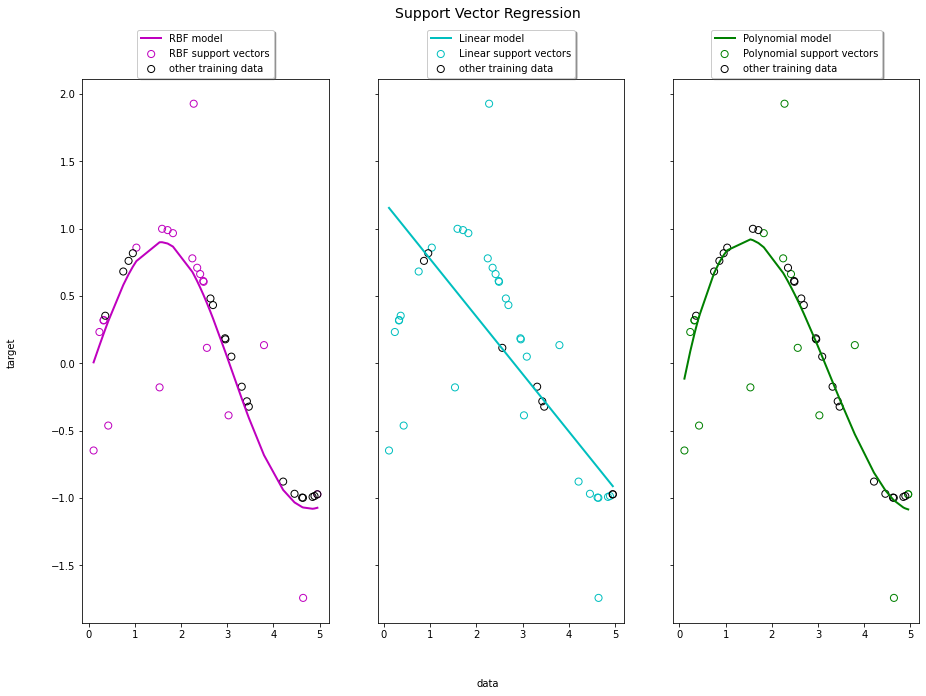

In [17]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()